In [1]:
import pandas as pd
import yfinance as yf

In [2]:
# here i am downloading the dataset from yahoo finance and storing it
sp500 = yf.download("^GSPC", start="2005-01-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
sp500.head()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2005-01-03,1202.079956,1217.800049,1200.319946,1211.920044,1510800000
2005-01-04,1188.050049,1205.839966,1185.390015,1202.079956,1721000000
2005-01-05,1183.739990,1192.729980,1183.719971,1188.050049,1738900000
2005-01-06,1187.890015,1191.630005,1183.270020,1183.739990,1569100000
2005-01-07,1186.189941,1192.199951,1182.160034,1187.890015,1477900000


In [4]:
sp500.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 5301 entries, 2005-01-03 to 2026-01-28
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^GSPC)   5301 non-null   float64
 1   (High, ^GSPC)    5301 non-null   float64
 2   (Low, ^GSPC)     5301 non-null   float64
 3   (Open, ^GSPC)    5301 non-null   float64
 4   (Volume, ^GSPC)  5301 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 248.5 KB


In [5]:
# saving the original data set
sp500.to_csv("../data/raw/sp500_raw.csv")

In [7]:
# here we create a return column to store the %changes 
sp500["Return"] = sp500["Close"].pct_change()

In [8]:
sp500[["Close", "Return"]].head()

Price,Close,Return
Ticker,^GSPC,
Date,,
2005-01-03,1202.079956,NaN
2005-01-04,1188.050049,-0.011671
2005-01-05,1183.739990,-0.003628
2005-01-06,1187.890015,0.003506
2005-01-07,1186.189941,-0.001431


In [9]:
sp500["Return"].describe()

count    5300.000000
mean        0.000405
std         0.012049
min        -0.119841
25%        -0.004040
50%         0.000737
75%         0.005721
max         0.115800
Name: Return, dtype: float64

In [10]:
# saving the updated dataset
sp500.to_csv("../data/processed/sp500_with_returns.csv")

In [11]:
# computing the rolling volatility and creating 2 new columns for the same for 20 day and 50 day period
sp500["Volatility_20"] = sp500["Return"].rolling(window=20).std()
sp500["Volatility_50"] = sp500["Return"].rolling(window=50).std()

In [12]:
sp500[["Return", "Volatility_20", "Volatility_50"]].head(30)

Price,Return,Volatility_20,Volatility_50
Ticker,,,
Date,,,
2005-01-03,NaN,NaN,NaN
2005-01-04,-0.011671,NaN,NaN
2005-01-05,-0.003628,NaN,NaN
2005-01-06,0.003506,NaN,NaN
2005-01-07,-0.001431,NaN,NaN
2005-01-10,0.003423,NaN,NaN
2005-01-11,-0.006100,NaN,NaN
2005-01-12,0.003981,NaN,NaN


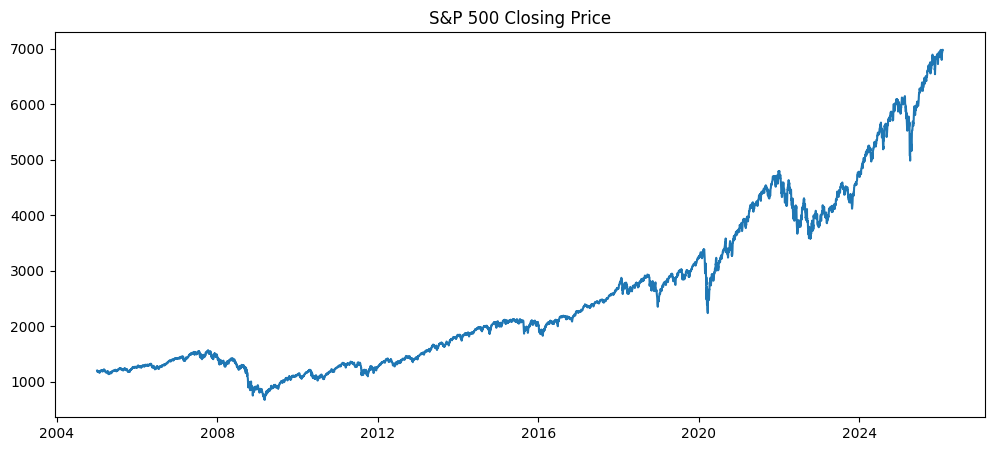

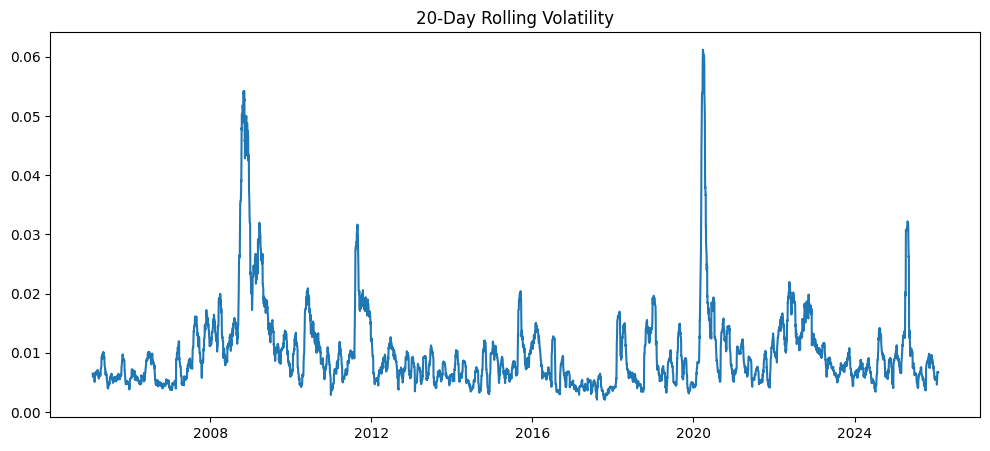

In [13]:
# plotting closing prices and 20-day rolling volatility
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(sp500.index, sp500["Close"])
plt.title("S&P 500 Closing Price")
plt.show()

plt.figure(figsize=(12,5))
plt.plot(sp500.index, sp500["Volatility_20"])
plt.title("20-Day Rolling Volatility")
plt.show()


In [14]:
sp500.to_csv("../data/processed/sp500_with_returns_and_volatility.csv")